## importing Librarie's

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
df=pd.read_csv('D:/Data Analysis/Adult_UCI_income/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [189]:
df.shape

(32561, 15)

In [190]:
df.size

488415

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [192]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [193]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [194]:
df.isna().sum().any()

False

In [195]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [196]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [197]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [198]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [199]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [200]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [201]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [202]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [203]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [204]:
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-specialty')
df['native.country']=df['native.country'].replace('?','United-States')

In [205]:
df.education=df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [206]:
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital.status']= df['marital.status'].replace(['Never-married'],'not-married')
df['marital.status']= df['marital.status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [207]:
df.income = df.income.replace('<=50K',0)
df.income = df.income.replace('>50K',1)

In [208]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
2236,65,Self-emp-not-inc,139960,high school,9,married,Farming-fishing,Husband,White,Male,10605,0,60,United-States,1
7817,52,Private,114062,high school,9,other,Craft-repair,Unmarried,White,Female,0,0,40,United-States,0
14721,18,Private,137363,higher,10,not-married,Prof-specialty,Own-child,White,Female,0,0,4,United-States,0
3605,27,Private,287476,high school,9,not-married,Craft-repair,Not-in-family,Black,Male,3325,0,40,United-States,0
6854,42,Private,307638,high school,9,other,Adm-clerical,Own-child,White,Female,0,0,40,United-States,0


<AxesSubplot:>

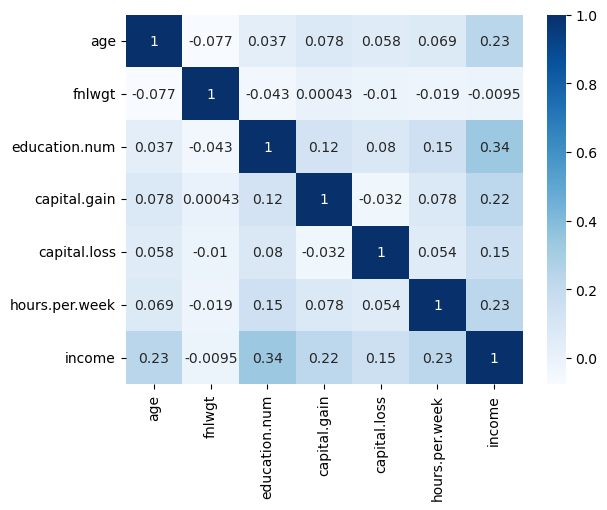

In [209]:
sns.heatmap(data=df.corr(),annot=True,cmap='Blues')

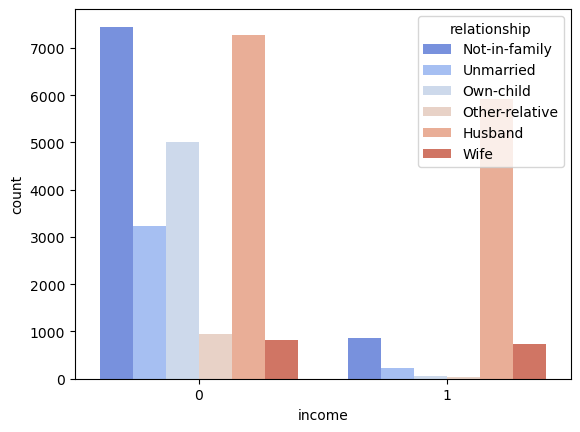

In [210]:
sns.countplot(df['income'], palette='coolwarm',hue='relationship', data=df);

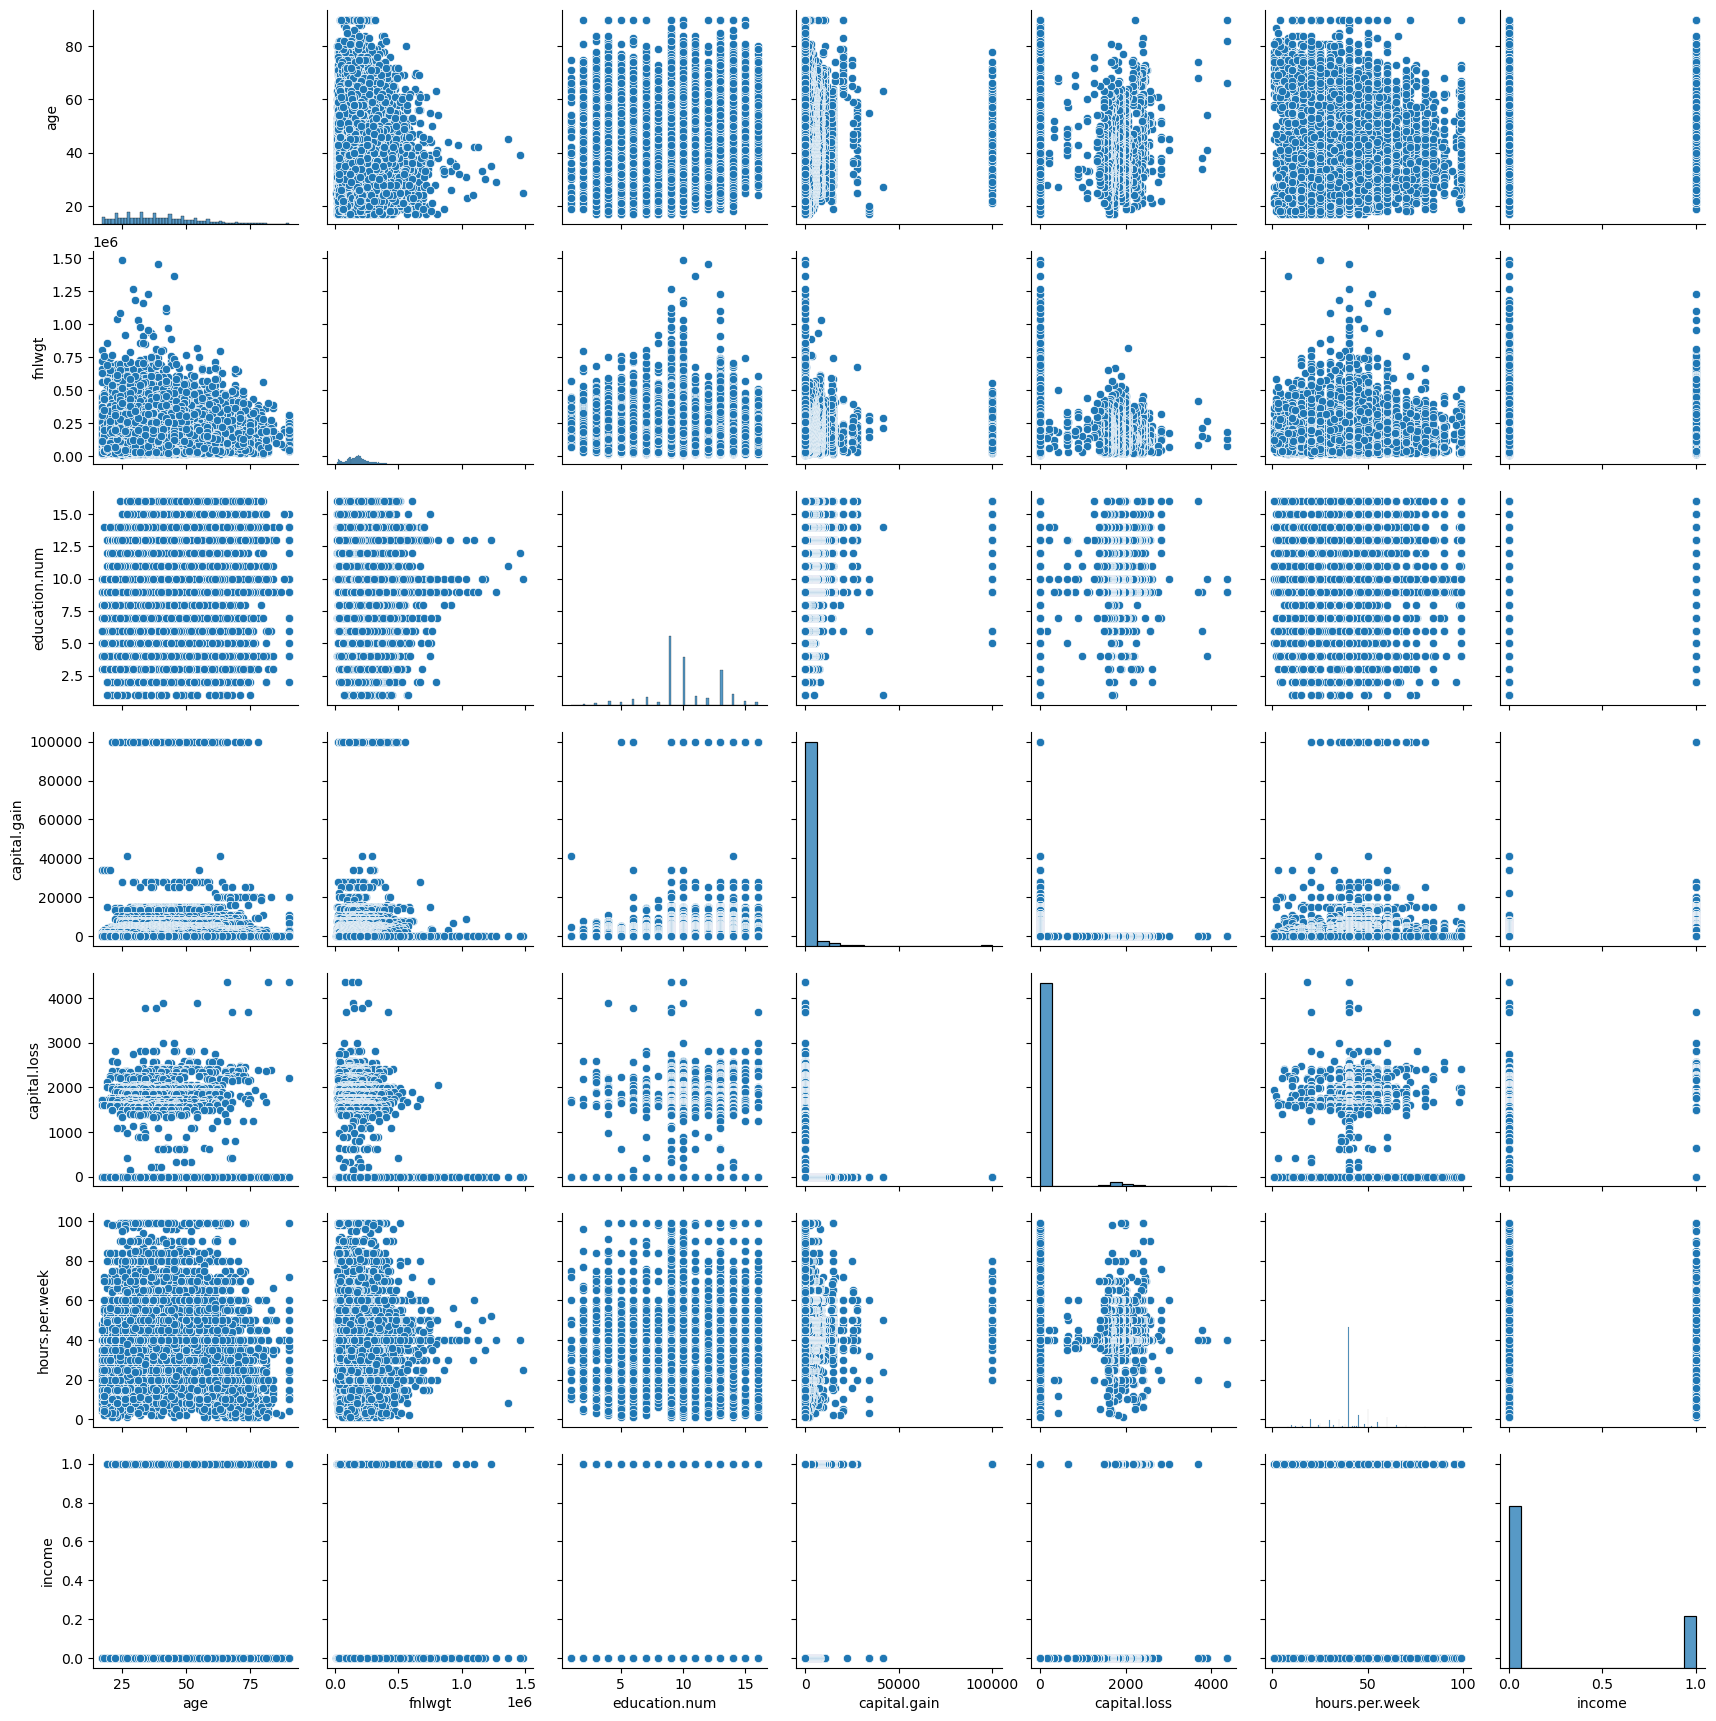

In [211]:
sns.pairplot(data=df)

In [212]:
px.pie(df,values='education.num', names='education', title='% of education',color_discrete_sequence=px.colors.qualitative.T10)

## Model Building

In [213]:
df1=df.copy()
df1=df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,38,0
2,49,3,11175,3,9,2,9,4,2,0,0,91,39,38,0
3,37,3,7009,4,3,2,6,4,4,0,0,90,39,38,0
4,24,3,16850,3,9,2,9,3,4,0,0,90,39,38,0


In [214]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(32561, 14) (22792, 14) (9769, 14)


In [216]:
scaler=StandardScaler()
scaler.fit(x_train,x_test)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-0.70558857, -0.09051875,  1.16479494, ..., -0.20503341,
        -0.0420937 ,  0.26061109],
       [-1.44189647, -0.09051875,  1.74170819, ..., -0.20503341,
        -2.09472432,  0.26061109],
       [-0.77921936, -0.09051875,  0.44613436, ..., -0.20503341,
        -0.0420937 ,  0.26061109],
       ...,
       [-0.26380382,  2.60752404, -0.39889139, ..., -0.20503341,
        -0.0420937 ,  0.26061109],
       [ 1.57696594, -0.09051875,  0.77660245, ..., -0.20503341,
        -0.0420937 ,  0.26061109],
       [-1.2210041 , -0.09051875,  0.98682514, ..., -0.20503341,
         0.6147481 ,  0.26061109]])

## Evaluation's

In [217]:
models=[KNeighborsClassifier(n_neighbors=11),GaussianNB(),SVC(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=11):84.49175964786569

GaussianNB():82.14760978605794

SVC():84.93192752584706

LogisticRegression():83.80591667519705

DecisionTreeClassifier():81.24680110553793

RandomForestClassifier():85.863445593203



              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.75      0.61      0.67      2340

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



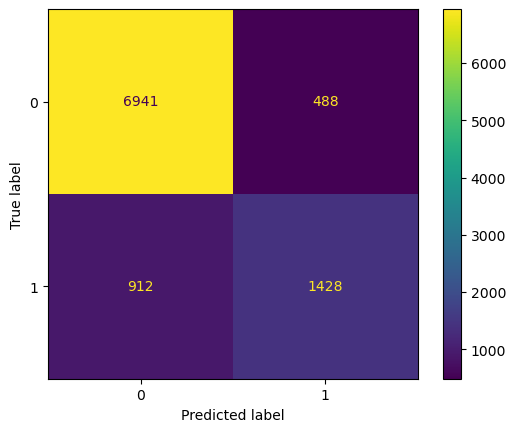

In [218]:
model1=models[5] 
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

In [219]:
print("Acc on training data: {:,.3f}".format(model1.score(x_train, y_train)))
print("Acc on test data: {:,.3f}".format(model1.score(x_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.857


In [220]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f" RMSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test,y_pred)}")

MAE: 0.1413655440679701
 RMSE: 0.1413655440679701
MAPE: 228199592133114.56
